In [1]:
# 3. Filtering

import cv2
import matplotlib.pyplot as plt


img_path = "pictures/Moon.png"

image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

size = 5
n = size // 2

(h, w) = image.shape
output1 = image.copy()
output2 = image.copy()

def insert_sorted(ls: list, x: int):
    for i in range(len(ls)):
        if x > ls[i]:
            ls.insert(i, x)
            return ls

    ls.append(x)
    return ls


# Iterate through image to adjust pixels
for i in range(h):
    for j in range(w):
        neighbours = []
        for x in range(i - n, i + n):
            for y in range(j - n, j + n):
                try:
                    v = image[x][y]
                    neighbours = insert_sorted(neighbours, v)
                except IndexError:
                    continue
        
        output1[i][j] = sum(neighbours) / len(neighbours)

        l = len(neighbours)
        if l % 2 != 0:
            output2[i][j] = neighbours[int(l / 2)]
        else:
            x = int(l / 2)
            output2[i][j] = (float(neighbours[x]) + float(neighbours[x + 1])) / 2.0

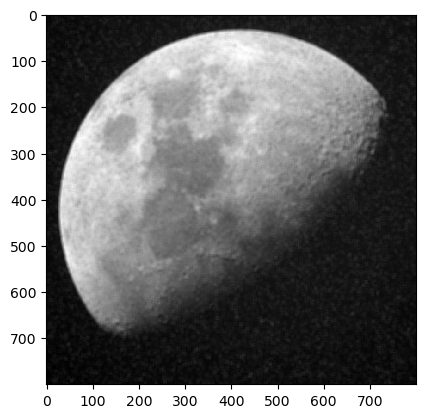

In [2]:
plt.imshow(output1, 'gray')

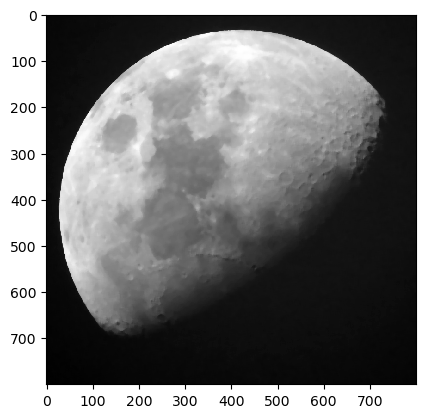

In [3]:
plt.imshow(output2, 'gray')